# Udacity PyTorch Scholarship Final Lab Challenge Guide  
**A hands-on guide to get 90% + accuracy and complete the challenge**

**By [Soumya Ranjan Behera](https://www.linkedin.com/in/soumya044)**

## This Tutorial will be divided into Two Parts,  
### [1. Model Building and Training](https://www.kaggle.com/soumya044/udacity-pytorch-final-lab-guide-part-1/)
### [2. Submit in Udcaity's Workspace for evaluation](https://www.kaggle.com/soumya044/udacity-pytorch-final-lab-guide-part-2/)

**Note:** This tutorial is like a template or guide for newbies to overcome the fear of the final lab challenge. My intent is not to promote plagiarism or any means of cheating. Users are encourage to take this tutorial as a baseline and build their own better model. Cheers!

**Fork this Notebook and Run it from Top-To-Bottom Step by Step**

# Part 1: Build and Train a Model

**Credits:** The dataset credit goes to [Lalu Erfandi Maula Yusnu](https://www.kaggle.com/nunenuh)

## 1. Import Data set and visualiza some data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['flower_data', 'cat_to_name.json']


**Import some visualization Libraries**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [3]:
# Set Train and Test Directory Variables
TRAIN_DATA_DIR = "../input/flower_data/flower_data/train/"
VALID_DATA_DIR = "../input/flower_data/flower_data/valid/"

Class Directory:  84


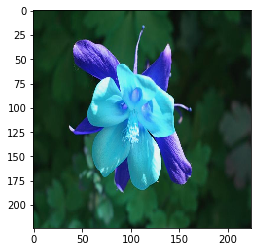

(224, 224, 3)


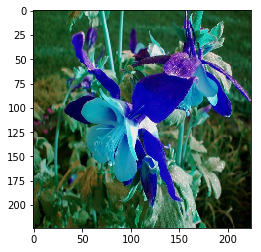

(224, 224, 3)


In [4]:
#Visualiza Some Images of any Random Directory-cum-Class
FILE_DIR = str(np.random.randint(1,103))
print("Class Directory: ",FILE_DIR)
for file_name in os.listdir(os.path.join(TRAIN_DATA_DIR, FILE_DIR))[1:3]:
    img_array = cv2.imread(os.path.join(TRAIN_DATA_DIR, FILE_DIR, file_name))
    img_array = cv2.resize(img_array,(224, 224), interpolation = cv2.INTER_CUBIC)
    plt.imshow(img_array)
    plt.show()
    print(img_array.shape)

## 2. Data Preprocessing (Image Augmentation)

**Import PyTorch libraries**

In [5]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
torch.__version__

'1.0.0'

**Note:** **Look carefully! Kaggle uses v1.0.0 while Udcaity workspace has v0.4.0 (Some issues may arise but we'll solve them)**

In [6]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


**Make a Class Variable i.e a list of Target Categories (List of 102 species) **

In [7]:
# I used os.listdir() to maintain the ordering 
classes = os.listdir(VALID_DATA_DIR)

**Load and Transform (Image Augmentation)**  
Soucre: https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_augmentation.ipynb

In [8]:
# Load and transform data using ImageFolder

# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(TRAIN_DATA_DIR, transform=data_transform)
test_data = datasets.ImageFolder(VALID_DATA_DIR, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  6552
Num test images:  818


### Find more on Image Transforms using PyTorch Here (https://pytorch.org/docs/stable/torchvision/transforms.html)

## 3. Make a DataLoader

In [9]:
# define dataloader parameters
batch_size = 32
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

**Visualize Sample Images**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

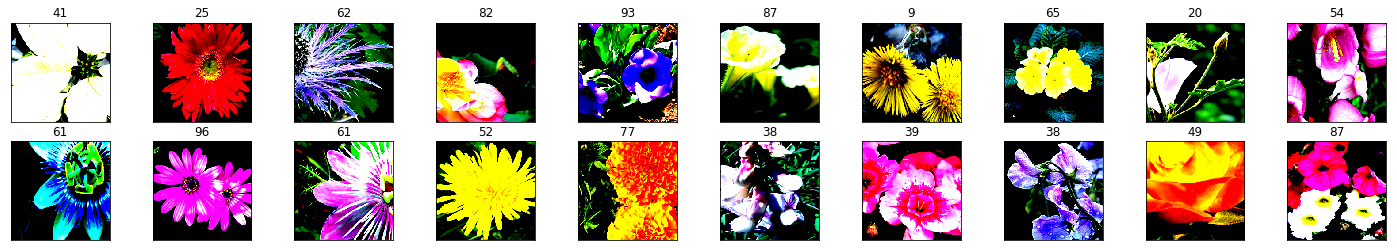

In [10]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

**Here plt.imshow() clips our data into [0,....,255] range to show the images. The Warning message is due to our Transform Function. We can Ignore it.**

## 4. Use a Pre-Trained Model (VGG16)   
Here we used a VGG16. You can experiment with other models.  
References: https://github.com/udacity/deep-learning-v2-pytorch/blob/master/transfer-learning/Transfer_Learning_Solution.ipynb

**Try More Models: ** https://pytorch.org/docs/stable/torchvision/models.html

In [11]:
# Load the pretrained model from pytorch
model = models.densenet161(pretrained=True)  
print(model)

/opt/conda/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /tmp/.torch/models/densenet161-8d451a50.pth
100%|██████████| 115730790/115730790 [00:04<00:00, 26966794.17it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

### We can see from above output that the last ,i.e, 6th Layer is a Fully-connected Layer with in_features=4096, out_features=1000

In [15]:
print(model.classifier.in_features) 
print(model.classifier.out_features)
# The above lines work for vgg only. For other models refer to print(model) and look for last FC layer

2208
1000


**Freeze Training for all 'Features Layers', Only Train Classifier Layers**

In [13]:
# Freeze training for all "features" layers
for param in model.features.parameters():
    param.requires_grad = False


#For models like ResNet or Inception use the following,

# Freeze training for all "features" layers
#     for _, param in model.named_parameters():
#         param.requires_grad = False

## Let's Add our own Last Layer which will have 102 out_features for 102 species

In [17]:
# VGG16  
n_inputs = model.classifier.in_features

#Others
# n_inputs = model.fc.in_features

# add last linear layer (n_inputs -> 102 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, len(classes))

# VGG16
model.classifier = last_layer

# Others
#model.fc = last_layer

# if GPU is available, move the model to GPU
if train_on_gpu:
    model.cuda()

# check to see that your last layer produces the expected number of outputs

#VGG
print(model.classifier.out_features)
#Others
#print(model.fc.out_features)

102


# 5. Specify our Loss Function and Optimzer

In [19]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.NLLLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01 or 0.001
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

# 6. Train our Model and Save necessary checkpoints

In [ ]:
# Define epochs (between 50-200)
epochs = 20
# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

# Some lists to keep track of loss and accuracy during each epoch
epoch_list = []
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []
# Start epochs
for epoch in range(epochs):
    
    #adjust_learning_rate(optimizer, epoch)
    
    # monitor training loss
    train_loss = 0.0
    val_loss = 0.0
    
    ###################
    # train the model #
    ###################
    # Set the training mode ON -> Activate Dropout Layers
    model.train() # prepare model for training
    # Calculate Accuracy         
    correct = 0
    total = 0
    
    # Load Train Images with Labels(Targets)
    for data, target in train_loader:
        
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        if type(output) == tuple:
            output, _ = output
        
        # Calculate Training Accuracy 
        predicted = torch.max(output.data, 1)[1]        
        # Total number of labels
        total += len(target)
        # Total correct predictions
        correct += (predicted == target).sum()
        
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    
    # calculate average training loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    
    # Avg Accuracy
    accuracy = 100 * correct / float(total)
    
    # Put them in their list
    train_acc_list.append(accuracy)
    train_loss_list.append(train_loss)
    
        
    # Implement Validation like K-fold Cross-validation 
    
    # Set Evaluation Mode ON -> Turn Off Dropout
    model.eval() # Required for Evaluation/Test

    # Calculate Test/Validation Accuracy         
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:


            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Predict Output
            output = model(data)
            if type(output) == tuple:
                output, _ = output

            # Calculate Loss
            loss = criterion(output, target)
            val_loss += loss.item()*data.size(0)
            # Get predictions from the maximum value
            predicted = torch.max(output.data, 1)[1]

            # Total number of labels
            total += len(target)

            # Total correct predictions
            correct += (predicted == target).sum()
    
    # calculate average training loss and accuracy over an epoch
    val_loss = val_loss/len(test_loader.dataset)
    accuracy = 100 * correct/ float(total)
    
    # Put them in their list
    val_acc_list.append(accuracy)
    val_loss_list.append(val_loss)
    
    # Print the Epoch and Training Loss Details with Validation Accuracy   
    print('Epoch: {} \tTraining Loss: {:.4f}\t Val. acc: {:.2f}%'.format(
        epoch+1, 
        train_loss,
        accuracy
        ))
    # save model if validation loss has decreased
    if val_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        val_loss))
        # Save Model State on Checkpoint
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = val_loss
    # Move to next epoch
    epoch_list.append(epoch + 1)

## Load Model State from Checkpoint

In [ ]:
model.load_state_dict(torch.load('model.pt'))

## Save the whole Model (Pickling)

In [ ]:
#Save/Pickle the Model
torch.save(model, 'classifier.pth')

# 7. Visualize Model Training and Validation

In [ ]:
# Training / Validation Loss
plt.plot(epoch_list,train_loss_list)
plt.plot(val_loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training/Validation Loss vs Number of Epochs")
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [ ]:
# Train/Valid Accuracy
plt.plot(epoch_list,train_acc_list)
plt.plot(val_acc_list)
plt.xlabel("Epochs")
plt.ylabel("Training/Validation Accuracy")
plt.title("Accuracy vs Number of Epochs")
plt.legend(['Train', 'Valid'], loc='best')
plt.show()

From the above graphs we get some really impressive results

**Overall Accuracy
**

In [ ]:
val_acc = sum(val_acc_list[:]).item()/len(val_acc_list)
print("Validation Accuracy of model = {} %".format(val_acc))

# 8. Test our Model Performance 

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

model.eval() # Required for Evaluation/Test
# get sample outputs
output = model(images)
if type(output) == tuple:
            output, _ = output
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(20, 5))
for idx in np.arange(12):
    ax = fig.add_subplot(3, 4, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(img[idx], (1, 2, 0)))
    ax.set_title("Pr: {} Ac: {}".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

**We can see that the Correctly Classifies Results are Marked in "Green" and the misclassifies ones are "Red"**

## 8.1 Test our Model Performance with Gabriele Picco's Program

**Credits: ** **Gabriele Picco** (https://github.com/GabrielePicco/deep-learning-flower-identifier)

**Special Instruction:**  
1. **Uncomment the following two code cells while running the notebook.**
2. Comment these two blocks while **Commit**, otherwise you will get an error "Too many Output Files" in Kaggle Only.
3. If you find a solution to this then let me know.

In [ ]:
# !git clone https://github.com/GabrielePicco/deep-learning-flower-identifier
# !pip install airtable
# import sys
# sys.path.insert(0, 'deep-learning-flower-identifier')

In [ ]:
# from test_model_pytorch_facebook_challenge import calc_accuracy
# calc_accuracy(model, input_image_size=224, use_google_testset=False)

## **Congrats! We got almost 90% accuracy with just a simple configuration!**  
(We will get almost 90% accuracy in Gabriele's Test Suite. Just Uncomment above two code cells and see.)

# 9. Export our Model Checkpoint File or Model Pickle File

**Just Right-click on Below link and Copy the Link**  
**And Proceed to [Part 2 Tutorial](https://www.kaggle.com/soumya044/udacity-pytorch-final-lab-guide-part-2/)**

## Links Here:  
**Model State Checkpoint File: [model.pt](./model.pt)**   (Preferred)  
**Classifier Pickle File: [classifier.pth](./classifier.pth)**  
(Right-click on model.pt and copy the link address)  

* If the links don't work then just modify the (link) as ./model.pt or ./classifier.pth

# **Proceed To Part 2: [Click Here](https://www.kaggle.com/soumya044/udacity-pytorch-final-lab-guide-part-2/)**

# Thank You  

If you liked this kernel please **Upvote**. Don't forget to drop a comment or suggestion.  

### *Soumya Ranjan Behera*
Let's stay Connected! [LinkedIn](https://www.linkedin.com/in/soumya044)  

**Happy Coding !**